In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

In [5]:
!pip install seaborn
import seaborn as sns

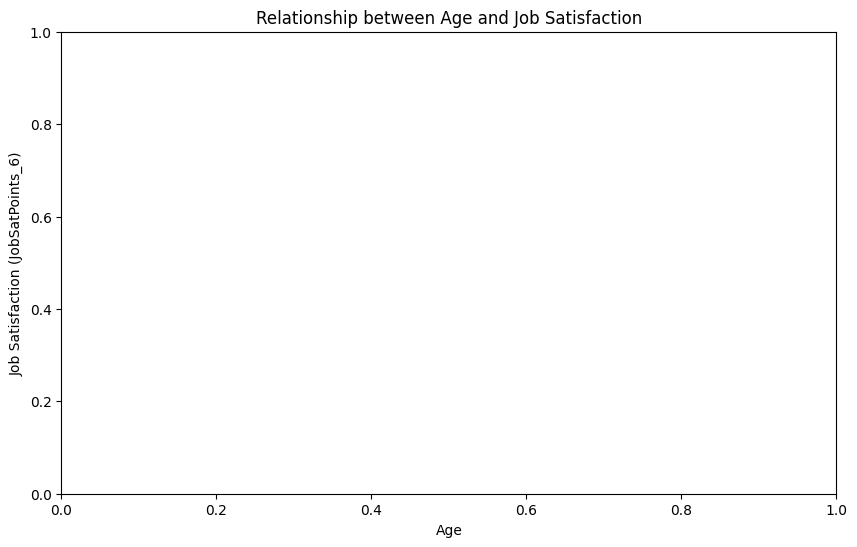

In [8]:
#1.1. Scatter Plot for Age vs. Job Satisfaction
age_order = [ "Under 18 years old", "18-24 years old", "25-34 years old", "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older" ] 
df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce") 
df = df.dropna(subset=["JobSatPoints_6", "Age"])
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(x=df["Age"], y=df["JobSatPoints_6"], alpha=0.5)

# Add a regression line
sns.regplot(x=df["Age"], y=df["JobSatPoints_6"], scatter=False, color="red")

# Labels and Title
plt.xlabel("Age")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.title("Relationship between Age and Job Satisfaction")

# Show plot
plt.show()

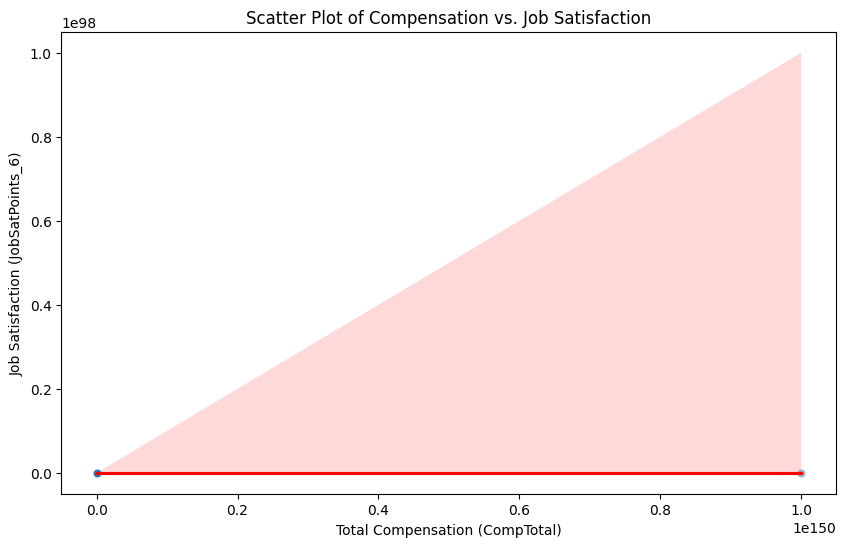

In [10]:
#1.2. Scatter Plot for Compensation vs. Job Satisfaction
df = pd.read_csv("survey-data.csv")
df = df[["CompTotal", "JobSatPoints_6"]].dropna()

# Convert Compensation to numeric (handle errors gracefully)
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")

# Drop rows with NaN values after conversion
df = df.dropna()
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(x=df["CompTotal"], y=df["JobSatPoints_6"], alpha=0.5)

# Add a regression line
sns.regplot(x=df["CompTotal"], y=df["JobSatPoints_6"], scatter=False, color="red")

# Labels and Title
plt.xlabel("Total Compensation (CompTotal)")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.title("Scatter Plot of Compensation vs. Job Satisfaction")

# Show the plot
plt.show()

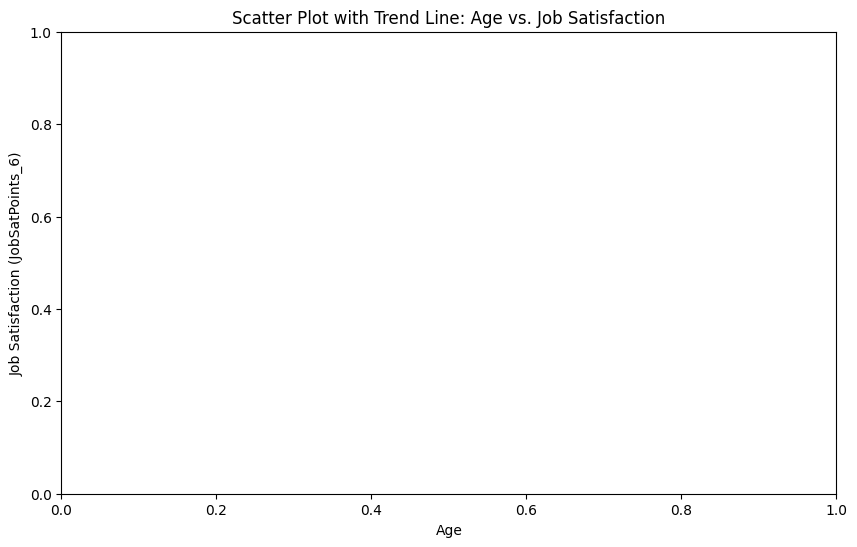

In [11]:
#2.1. Scatter Plot with Trend Line for Age vs. Job Satisfaction
df = pd.read_csv("survey-data.csv")
df = df[["Age", "JobSatPoints_6"]].dropna()

# Convert Age to numeric (handle errors gracefully)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# Drop rows with NaN values after conversion
df = df.dropna()
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(x=df["Age"], y=df["JobSatPoints_6"], alpha=0.5)

# Add a regression line
sns.regplot(x=df["Age"], y=df["JobSatPoints_6"], scatter=False, color="red")

# Labels and Title
plt.xlabel("Age")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.title("Scatter Plot with Trend Line: Age vs. Job Satisfaction")

# Show the plot
plt.show()

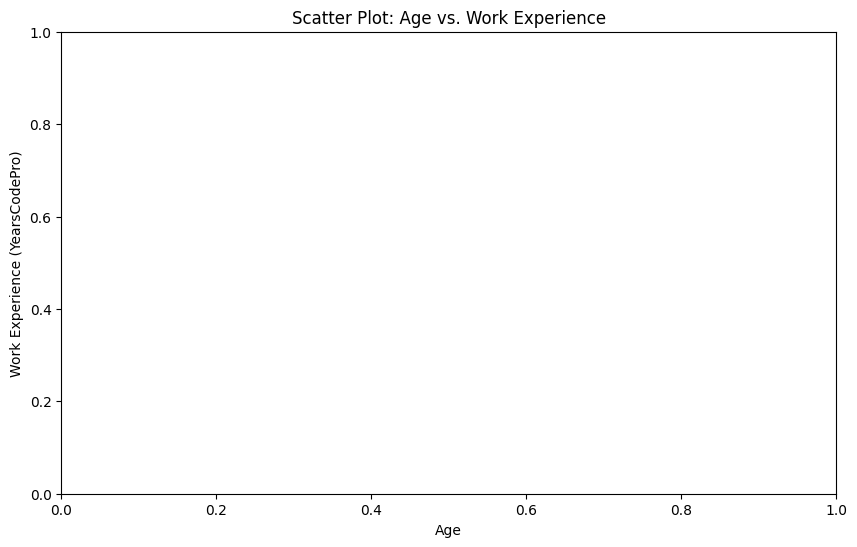

In [12]:
#2.2. Scatter Plot for Age vs. Work Experience
df = pd.read_csv("survey-data.csv")
df = df[["Age", "YearsCodePro"]].dropna()

# Convert columns to numeric (handle errors gracefully)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

# Drop NaN values after conversion
df = df.dropna()
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(x=df["Age"], y=df["YearsCodePro"], alpha=0.5)

# Labels and Title
plt.xlabel("Age")
plt.ylabel("Work Experience (YearsCodePro)")
plt.title("Scatter Plot: Age vs. Work Experience")

# Show the plot
plt.show()

/tmp/ipykernel_2908/3376077351.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Age")


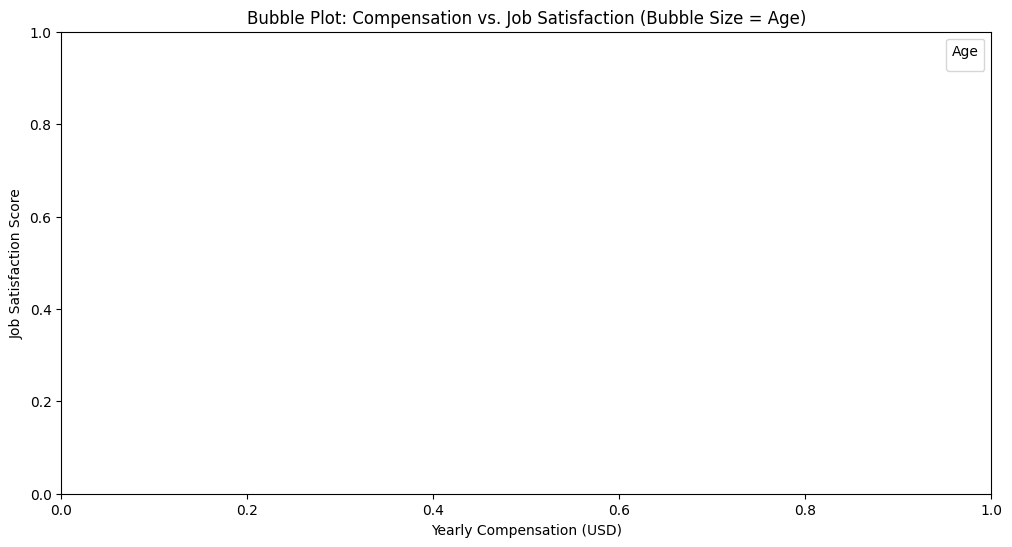

In [13]:
#3.1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size
df = pd.read_csv("survey-data.csv")
df = df[["ConvertedCompYearly", "JobSatPoints_6", "Age"]].dropna()

# Convert columns to numeric (handle errors gracefully)
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# Drop NaN values after conversion
df = df.dropna()
plt.figure(figsize=(12, 6))

# Create Bubble Plot
sns.scatterplot(
    x=df["ConvertedCompYearly"], 
    y=df["JobSatPoints_6"], 
    size=df["Age"], 
    sizes=(10, 1000),  # Define min and max bubble sizes
    alpha=0.5,
    edgecolor="black"
)

# Labels and Title
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction Score")
plt.title("Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)")

# Show legend and plot
plt.legend(title="Age")
plt.show()

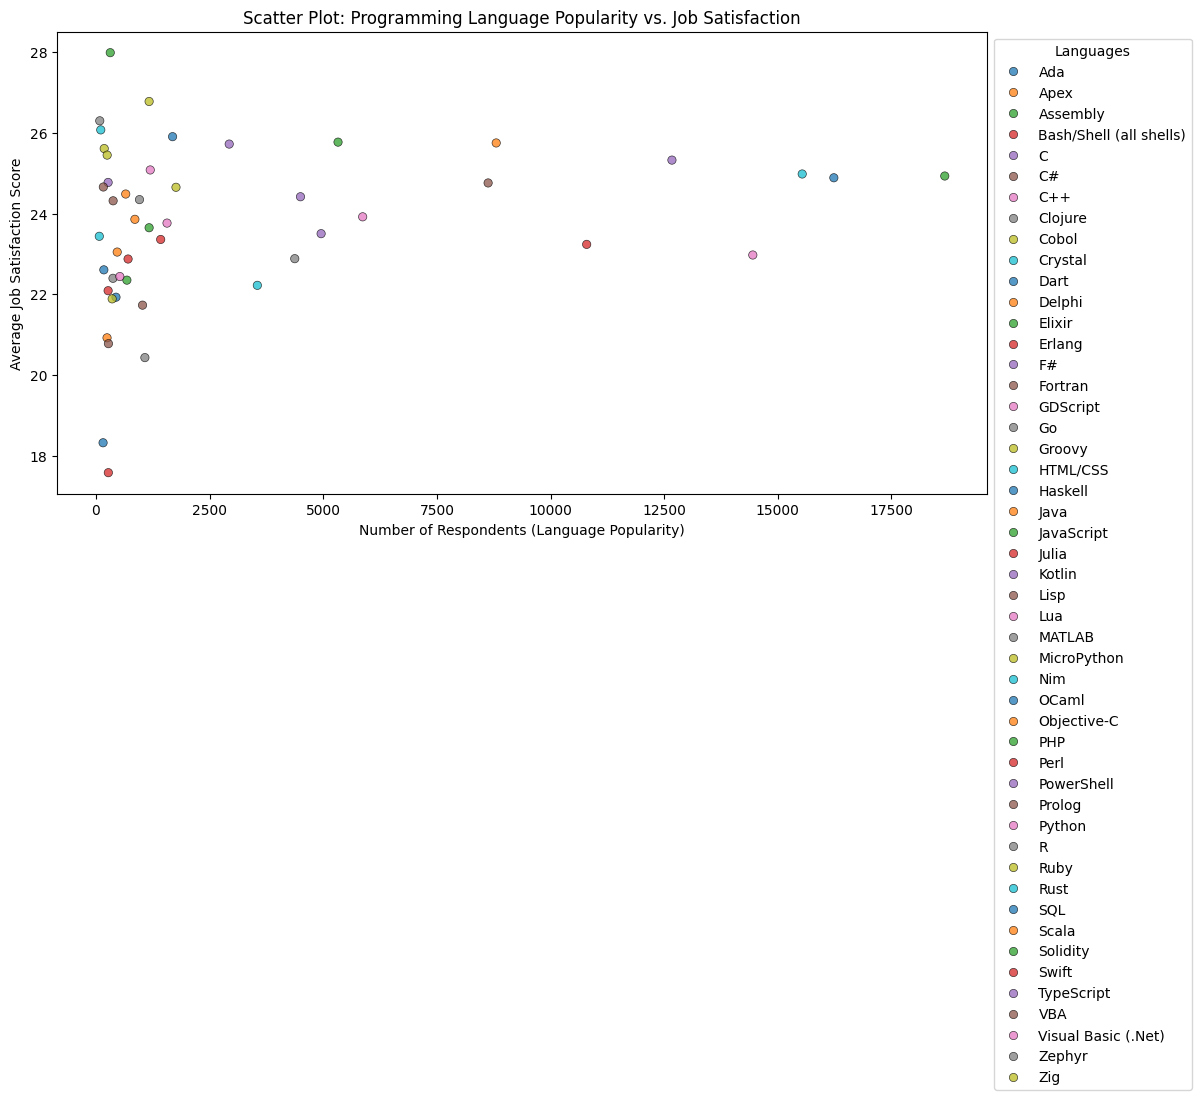

In [15]:
#3.2. Scatter Plot for Popular Programming Languages by Job Satisfaction
df = pd.read_csv("survey-data.csv")
df = df[["LanguageHaveWorkedWith", "JobSatPoints_6"]].dropna()

# Split multiple languages into separate rows
df = df.assign(LanguageHaveWorkedWith=df["LanguageHaveWorkedWith"].str.split(";")).explode("LanguageHaveWorkedWith")

# Aggregate: Compute the average job satisfaction for each language
lang_sat = df.groupby("LanguageHaveWorkedWith")["JobSatPoints_6"].mean().reset_index()

# Count the number of respondents per language
lang_count = df["LanguageHaveWorkedWith"].value_counts().reset_index()
lang_count.columns = ["LanguageHaveWorkedWith", "Count"]

# Merge datasets
lang_data = pd.merge(lang_sat, lang_count, on="LanguageHaveWorkedWith")
plt.figure(figsize=(12, 6))

# Create Scatter Plot
sns.scatterplot(
    x=lang_data["Count"], 
    y=lang_data["JobSatPoints_6"], 
    hue=lang_data["LanguageHaveWorkedWith"],  # Color by language
    palette="tab10", 
    alpha=0.75,
    edgecolor="black"
)

# Labels and Title
plt.xlabel("Number of Respondents (Language Popularity)")
plt.ylabel("Average Job Satisfaction Score")
plt.title("Scatter Plot: Programming Language Popularity vs. Job Satisfaction")
plt.legend(title="Languages", bbox_to_anchor=(1, 1))

# Show plot
plt.show()

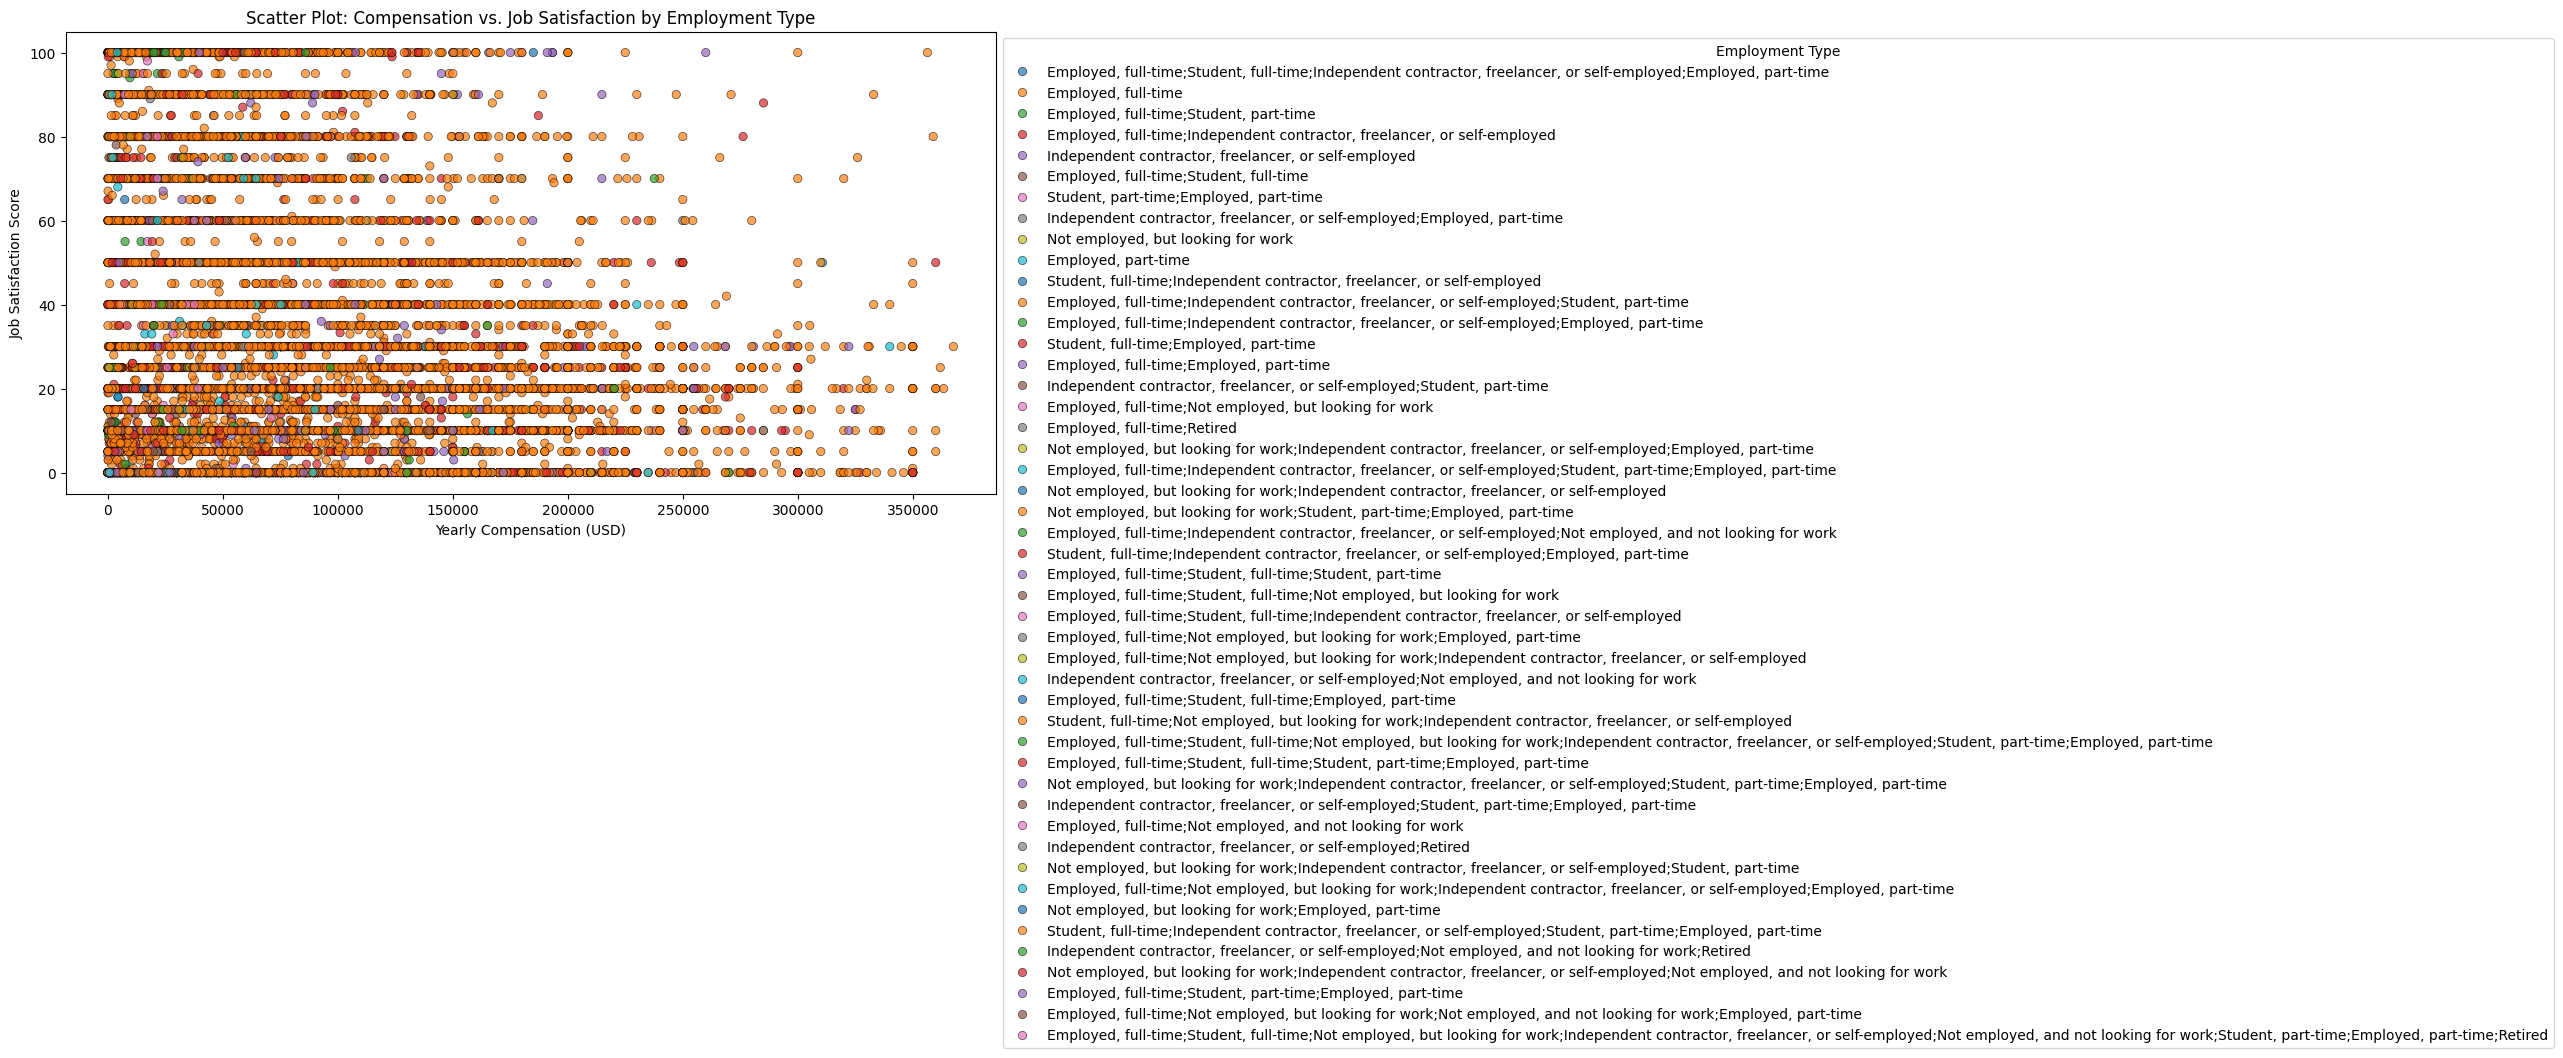

In [16]:
#4.1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type
df = pd.read_csv("survey-data.csv")
df = df[["ConvertedCompYearly", "JobSatPoints_6", "Employment"]].dropna()

# Remove extreme outliers in compensation (e.g., above 99th percentile)
df = df[df["ConvertedCompYearly"] < df["ConvertedCompYearly"].quantile(0.99)]
plt.figure(figsize=(12, 6))

# Create scatter plot with employment type differentiation
sns.scatterplot(
    x=df["ConvertedCompYearly"], 
    y=df["JobSatPoints_6"], 
    hue=df["Employment"],  # Color by employment type
    palette="tab10", 
    alpha=0.7,
    edgecolor="black"
)

# Labels and Title
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction Score")
plt.title("Scatter Plot: Compensation vs. Job Satisfaction by Employment Type")
plt.legend(title="Employment Type", bbox_to_anchor=(1, 1))

# Show plot
plt.show()


In [ ]:
#4.2. Scatter Plot for Work Experience vs. Age Group by Country
df = pd.read_csv("survey-data.csv")